# Satisfaction Analysis

In [1]:
import sys
sys.path.insert(0,'../scripts')

In [2]:
# Setting Notebook preference options, and
# Importing External Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from joblib import dump
pd.set_option('max_column', None)
pd.set_option('display.float_format', '{:.2f}'.format)
%matplotlib inline

In [3]:
# Importing Local Modules
from data_loader import load_df_from_csv
import sql_utils as sql
from results_pickler import ResultPickler

In [4]:
results = ResultPickler()

Assuming that the satisfaction of a user is dependent on user engagement and experience

## Task 4.1

### Engagement score of each user

In [5]:
# Get centroid value from the previous files
engagement_centroids = load_df_from_csv('../data/engagement_centroid.csv')
engagement_centroids = engagement_centroids.iloc[:,1:]
engagement_centroids

,Bearer Id,Total Duration (hr),Total Data (MegaBytes)
0,145.79,106.46,144.66
1,1.03,1.16,1.03
2,-0.34,-0.41,-0.34
3,2.06,2.84,2.07
4,0.17,0.20,0.17


In [6]:
# Get standardized engagement metric values
engagement_metrics = load_df_from_csv('../data/engagement_cluster.csv')
engagement_metrics.index = engagement_metrics['MSISDN/Number']
engagement_metrics = engagement_metrics.iloc[:,1:4]
engagement_metrics

,Bearer Id,Total Duration (hr),Total Data (MegaBytes)
MSISDN/Number,,,
33601001472.00,-0.31,-0.22,-0.29
33601003520.00,-0.44,-0.45,-0.41
33601007616.00,-0.17,-0.52,-0.06
33601009664.00,-0.31,-0.28,-0.40
33601011712.00,-0.17,-0.34,-0.30
...,...,...,...
33789980672.00,-0.31,-0.34,-0.28
33789997056.00,-0.31,-0.43,-0.25
3197020930048.00,-0.44,0.62,-0.51


In [7]:
# Calculating the distance between the metric values and the centroid of the the first k-means cluster
engagement_score = euclidean_distances(engagement_metrics.values.tolist(),[engagement_centroids.values.tolist()[0]])
engagement_score

array([[231.80647662],
       [232.07399614],
       [231.71948806],
       ...,
       [231.64388318],
       [231.9955218 ],
       [231.6645435 ]])

In [8]:
# changing engagement score from a list of lists to list of values only
engagement_score = [val[0] for val in engagement_score.tolist()]
engagement_score[:2]

[231.80647661624528, 232.07399614420402]

### Experience score of each user

In [9]:
# Get centroid value from the previous files
experience_centroids = load_df_from_csv('../data/experience_centroid.csv')
experience_centroids = experience_centroids.iloc[:,1:]
experience_centroids

,TCP retransmission (Bytes),Avg Delay (ms),Avg Throughput (kbps)
0,2.40,1.95,2.44
1,0.80,0.70,0.65
2,126.01,148.40,129.49
3,-0.29,-0.25,-0.26


In [10]:
# Get standardized experience metric values
experience_metrics = load_df_from_csv('../data/experience_cluster.csv')
experience_metrics.index = experience_metrics['MSISDN/Number']
experience_metrics = experience_metrics.iloc[:,1:4]
experience_metrics

,TCP retransmission (Bytes),Avg Delay (ms),Avg Throughput (kbps)
MSISDN/Number,,,
33601001472.00,-0.33,-0.34,-0.41
33601003520.00,-0.43,-0.39,-0.41
33601007616.00,0.50,-0.12,0.13
33601009664.00,-0.33,-0.35,-0.33
33601011712.00,-0.32,-0.29,0.00
...,...,...,...
33789980672.00,-0.43,-0.27,-0.41
33789997056.00,-0.42,-0.31,-0.31
3197020930048.00,-0.43,-0.39,-0.41


In [11]:
# Calculating the distance between the metric values and the centroid of the the first k-means cluster
experience_score = euclidean_distances(experience_metrics.values.tolist(),[experience_centroids.values.tolist()[0]])
experience_score

array([[4.5578801 ],
       [4.64578708],
       [3.6344266 ],
       ...,
       [4.64633983],
       [4.64615556],
       [4.64633407]])

In [12]:
# changing experience score from a list of lists to list of values only
experience_score = [val[0] for val in experience_score.tolist()]
experience_score[:2]

[4.557880095234561, 4.645787079254697]

## Task 4.2

#### Top 10 satisfied customer (satisfaction score = average of both engagement & experience scores)

In [13]:
#creating a dataframe to contain both engagement and experience score with index being 'MSISDN/Number' to identify the user
df = pd.DataFrame()
df['engagement_score'] = engagement_score
df['experience_score'] = experience_score
df.index = engagement_metrics.index
#Saving the data
results.add_data('engagement_score',df.iloc[:,:1])
results.add_data('experience_score',df.iloc[:,1:2])
#result
df

,engagement_score,experience_score
MSISDN/Number,,
33601001472.00,231.81,4.56
33601003520.00,232.07,4.65
33601007616.00,231.72,3.63
33601009664.00,231.91,4.52
33601011712.00,231.78,4.28
...,...,...
33789980672.00,231.85,4.58
33789997056.00,231.88,4.54
3197020930048.00,231.64,4.65


In [14]:
# Creating a new column for the dataframe representing satisfaction calculated as an average of engagement and experience score
df['satisfaction_score'] = (df['engagement_score'] + df['experience_score'])/2
df

,engagement_score,experience_score,satisfaction_score
MSISDN/Number,,,
33601001472.00,231.81,4.56,118.18
33601003520.00,232.07,4.65,118.36
33601007616.00,231.72,3.63,117.68
33601009664.00,231.91,4.52,118.21
33601011712.00,231.78,4.28,118.03
...,...,...,...
33789980672.00,231.85,4.58,118.22
33789997056.00,231.88,4.54,118.21
3197020930048.00,231.64,4.65,118.15


In [15]:
# Identifying the top 10 satisfied customers by sorting the dataframe by the satisfaction column in a descending order and chosing only 10 of them
top_10_satisfied_customers = df.sort_values(by='satisfaction_score', ascending=False).iloc[:10,:]
#Saving the data
results.add_data('top_10_satisfied_customers',top_10_satisfied_customers)
#result
top_10_satisfied_customers

,engagement_score,experience_score,satisfaction_score
MSISDN/Number,,,
33609267200.00,232.24,4.73,118.48
33628383232.00,232.25,4.71,118.48
33607706624.00,232.24,4.71,118.48
33684199424.00,232.24,4.71,118.47
33624229888.00,232.21,4.73,118.47
33648394240.00,232.23,4.71,118.47
33677170688.00,232.24,4.70,118.47
33763940352.00,232.23,4.71,118.47
33751328768.00,232.23,4.70,118.47


## Task 4.3

#### Building a regression model to predict the satisfaction score of a customer

In [16]:
# Our standardized dataframes from engagement cluster and experience cluster will be used
# Engagement Data
engagement_metrics

,Bearer Id,Total Duration (hr),Total Data (MegaBytes)
MSISDN/Number,,,
33601001472.00,-0.31,-0.22,-0.29
33601003520.00,-0.44,-0.45,-0.41
33601007616.00,-0.17,-0.52,-0.06
33601009664.00,-0.31,-0.28,-0.40
33601011712.00,-0.17,-0.34,-0.30
...,...,...,...
33789980672.00,-0.31,-0.34,-0.28
33789997056.00,-0.31,-0.43,-0.25
3197020930048.00,-0.44,0.62,-0.51


In [17]:
# Experience Data
experience_metrics

,TCP retransmission (Bytes),Avg Delay (ms),Avg Throughput (kbps)
MSISDN/Number,,,
33601001472.00,-0.33,-0.34,-0.41
33601003520.00,-0.43,-0.39,-0.41
33601007616.00,0.50,-0.12,0.13
33601009664.00,-0.33,-0.35,-0.33
33601011712.00,-0.32,-0.29,0.00
...,...,...,...
33789980672.00,-0.43,-0.27,-0.41
33789997056.00,-0.42,-0.31,-0.31
3197020930048.00,-0.43,-0.39,-0.41


In [18]:
# Form a new Model training Dataframe consisting all of the columns
train_df = engagement_metrics.copy(deep=True)
train_df['TCP retransmission (Bytes)'] = experience_metrics['TCP retransmission (Bytes)']
train_df['Avg Delay (ms)'] = experience_metrics['Avg Delay (ms)']
train_df['Avg Throughput (kbps)'] = experience_metrics['Avg Throughput (kbps)']
train_df

,Bearer Id,Total Duration (hr),Total Data (MegaBytes),TCP retransmission (Bytes),Avg Delay (ms),Avg Throughput (kbps)
MSISDN/Number,,,,,,
33601001472.00,-0.31,-0.22,-0.29,-0.33,-0.34,-0.41
33601003520.00,-0.44,-0.45,-0.41,-0.43,-0.39,-0.41
33601007616.00,-0.17,-0.52,-0.06,0.50,-0.12,0.13
33601009664.00,-0.31,-0.28,-0.40,-0.33,-0.35,-0.33
33601011712.00,-0.17,-0.34,-0.30,-0.32,-0.29,0.00
...,...,...,...,...,...,...
33789980672.00,-0.31,-0.34,-0.28,-0.43,-0.27,-0.41
33789997056.00,-0.31,-0.43,-0.25,-0.42,-0.31,-0.31
3197020930048.00,-0.44,0.62,-0.51,-0.43,-0.39,-0.41


In [19]:
# Adding our average satisfaction score (this is going to be our predicted value)
train_df['satisfaction_score'] = df['satisfaction_score']
# Finished preparing the train Data for the model
train_df

,Bearer Id,Total Duration (hr),Total Data (MegaBytes),TCP retransmission (Bytes),Avg Delay (ms),Avg Throughput (kbps),satisfaction_score
MSISDN/Number,,,,,,,
33601001472.00,-0.31,-0.22,-0.29,-0.33,-0.34,-0.41,118.18
33601003520.00,-0.44,-0.45,-0.41,-0.43,-0.39,-0.41,118.36
33601007616.00,-0.17,-0.52,-0.06,0.50,-0.12,0.13,117.68
33601009664.00,-0.31,-0.28,-0.40,-0.33,-0.35,-0.33,118.21
33601011712.00,-0.17,-0.34,-0.30,-0.32,-0.29,0.00,118.03
...,...,...,...,...,...,...,...
33789980672.00,-0.31,-0.34,-0.28,-0.43,-0.27,-0.41,118.22
33789997056.00,-0.31,-0.43,-0.25,-0.42,-0.31,-0.31,118.21
3197020930048.00,-0.44,0.62,-0.51,-0.43,-0.39,-0.41,118.15


In [20]:
# Dividing the train data into actual train data (train + validation) and test data
# 80 (60 + 20) and 20
train_data = train_df.iloc[:int(len(train_df) * 0.8),:]
test_data = train_df.iloc[int(len(train_df) * 0.8):,:]

In [21]:
train_x = train_data.iloc[:,:-1]
train_y = train_data.iloc[:,-1:]

In [22]:
test_x = test_data.iloc[:,:-1]
test_y = test_data.iloc[:,-1:]

In [23]:
# Classifying the test data to train and validation sets
xtrain,xtest,ytrain,ytest = train_test_split(train_x,train_y,test_size=0.2,random_state=40)

In [24]:
# Training the Ridge Regression Model on the splited training data
# Implementing Ridge Regression Model
alpha_val = 0.8
rr = Ridge(alpha=alpha_val)
rr.fit(xtrain, ytrain)
# Validation value of the model
validation_score = rr.score(xtest, ytest)
print("The model score is: {:.5f}".format(validation_score))

The model score is: 0.69497


In [25]:
# Training the best Model(Ridge) on the whole train data
rr.fit(train_x, train_y)
# Test on the test data
final_score = rr.score(test_x,test_y)
print("The model final score is: {:.5f}".format(final_score))

The model final score is: 0.69113


In [26]:
model_desc = {'Model Name': "Ridge Model",'alpha':alpha_val,'Validation score': validation_score, 'Test Score': final_score}
#Saving the model data
results.add_data('model_desc',model_desc)
#result
model_desc

{'Model Name': 'Ridge Model',
 'alpha': 0.8,
 'Validation score': 0.6949729675334224,
 'Test Score': 0.6911274981670685}

In [27]:
# Saving the final Model using joblibs dump
dump(rr, '../models/satisfaction_scorer_model.joblib')

['../models/satisfaction_scorer_model.joblib']

## Task 4.4

####  Clustering users based on the engagement & the experience score

In [28]:
# Creating a working dataframe with engagement score and experience score
cluster_df = df.iloc[:,:2]
cluster_df

,engagement_score,experience_score
MSISDN/Number,,
33601001472.00,231.81,4.56
33601003520.00,232.07,4.65
33601007616.00,231.72,3.63
33601009664.00,231.91,4.52
33601011712.00,231.78,4.28
...,...,...
33789980672.00,231.85,4.58
33789997056.00,231.88,4.54
3197020930048.00,231.64,4.65


In [29]:
# Creating a k-means cluster with 2 number of clusters
km = KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42)
label = km.fit_predict(cluster_df)
centroids = km.cluster_centers_
print(f'# Centroids of the clustering:\n{centroids}')
print(f'# The number of iterations required to converge: {km.inertia_}')
print(f'# The number of iterations required to converge: {km.n_iter_}')

# Centroids of the clustering:
[[231.77172475   4.36782542]
 [229.17704785   2.37432774]]
# The number of iterations required to converge: 125268.79716362809
# The number of iterations required to converge: 7


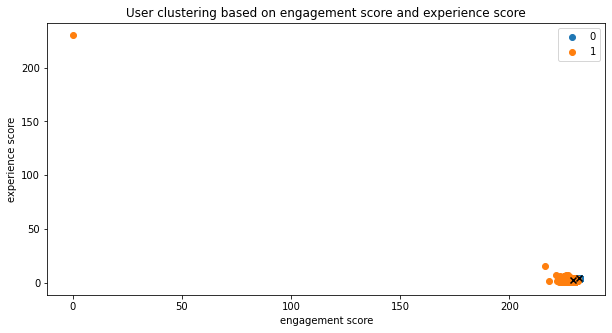

In [30]:
#plotting the result of the cluster
#Getting index based on clusters
u_labels = np.unique(label)
 
#plotting the results:
plt.figure(figsize=(10,5))
plt.title(f'User clustering based on engagement score and experience score')
for i in u_labels:
    plt.scatter(cluster_df[label == i].iloc[:,0] , cluster_df[label == i].iloc[:,1], marker='o', label = i)
plt.scatter(centroids[:,0] , centroids[:,1], marker='x', color = 'black')
plt.xlabel("engagement score")
plt.ylabel("experience score")
plt.legend()
plt.savefig('../data/satisfaction_cluster.png')
plt.show()

## Task 4.5

#### Aggregating the average satisfaction, experience, and engagement score per cluster

In [31]:
# Getting our dataframe containing both experience score and satisfaction score
df

,engagement_score,experience_score,satisfaction_score
MSISDN/Number,,,
33601001472.00,231.81,4.56,118.18
33601003520.00,232.07,4.65,118.36
33601007616.00,231.72,3.63,117.68
33601009664.00,231.91,4.52,118.21
33601011712.00,231.78,4.28,118.03
...,...,...,...
33789980672.00,231.85,4.58,118.22
33789997056.00,231.88,4.54,118.21
3197020930048.00,231.64,4.65,118.15


In [32]:
# Attaching the cluster index from the previous clustering using the label data
agg_df = df.copy(deep=True)
agg_df['cluster'] = label
agg_df

,engagement_score,experience_score,satisfaction_score,cluster
MSISDN/Number,,,,
33601001472.00,231.81,4.56,118.18,0
33601003520.00,232.07,4.65,118.36,0
33601007616.00,231.72,3.63,117.68,0
33601009664.00,231.91,4.52,118.21,0
33601011712.00,231.78,4.28,118.03,0
...,...,...,...,...
33789980672.00,231.85,4.58,118.22,0
33789997056.00,231.88,4.54,118.21,0
3197020930048.00,231.64,4.65,118.15,0


In [33]:
#Group and aggregate the dataframe based on cluster and average for the other columns respectively
#define agg columns
agg_columns = {'engagement_score':'mean','experience_score':'mean','satisfaction_score':'mean'}
#Group and Aggregate
agg_df =agg_df.groupby('cluster').agg(agg_columns)
#Saving the data
results.add_data('statisfaction_agg_cluster',agg_df)
#result
agg_df

,engagement_score,experience_score,satisfaction_score
cluster,,,
0,231.77,4.37,118.07
1,229.18,2.37,115.77


## Task 4.6

#### Exporting dataframe containing MSISDN/Number + engagement, experience & satisfaction scores in to a local MySQL database

In [34]:
# The dataframe we are gonna save
final_df = df.copy(deep=True)
final_df.reset_index(inplace=True)
final_df = final_df.rename(columns={'MSISDN/Number': 'user_id'})
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35090 entries, 0 to 35089
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             35090 non-null  float64
 1   engagement_score    35090 non-null  float64
 2   experience_score    35090 non-null  float64
 3   satisfaction_score  35090 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [35]:
# Create our table schema dicitonary for the dataframe to be saved
data = {'user_id': 'FLOAT NOT NULL',
        'engagement_score': 'INT NOT NULL',
        'experience_score': 'INT NOT NULL',
        'satisfaction_score': 'INT DEFAULT NULL',
        }
additional_data = {
    'ENGINE': 'InnoDB',
    'DEFAULT CHARSET': 'utf8mb4 COLLATE utf8mb4_unicode_ci'
}

In [36]:
# Creating schema from the schema dictionaries
sql.create_and_save_schema('../data/schema.sql', "user_satisfaction", data,
                                 'user_id', additional_data=additional_data)
# Creating the Database
sql.createDB(dbName='TeleCo')
# Altering the Database Encoding
sql.alter_DB(dbName='TeleCo')

In [37]:
# Creating the table from our defined schema
sql.createTable(dbName='TeleCo', table_schema='../data/schema.sql')
# Inserting the dataframe values from our dataframe
sql.insert_to_table(dbName='TeleCo', df=final_df,table_name='user_satisfaction', table_schema='../data/schema.sql')

All Data Inserted Successfully


In [38]:
# Visualizing our inserted data by querying the database
values = sql.db_get_values(dbName='TeleCo')
retrieve_df = pd.DataFrame(values, columns=['user_id','engagement_score','experience_score','satisfaction_score'])
retrieve_df

,user_id,engagement_score,experience_score,satisfaction_score
0,33601000000.00,231,4,118
1,33601000000.00,232,4,118
2,33601000000.00,231,3,117
3,33601000000.00,231,4,118
4,33601000000.00,231,4,118
5,33601000000.00,231,4,118
6,33601000000.00,232,4,118
7,33601000000.00,231,4,117
8,33601000000.00,232,4,118
9,33601000000.00,231,4,118


In [39]:
results.save_data('../data/satisfaction_results.pickle')